<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/pHSensor/blob/main/AnalisedadospH(m_aquoso).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd 
read_file = pd.read_excel ("/content/dadospH.xlsx")

In [113]:
read_file.to_csv ("/content/dadospH.csv",  
                  index = None, 
                  header=True)

In [114]:
df = pd.DataFrame(pd.read_csv("/content/dadospH.csv"))

In [115]:
df

,pH_Meio_Aquoso,pH_Medicao_Direta_Akso,ESP32_Média_Movel
0,7.0,7.23,607
1,6.7,6.83,695
2,7.2,6.92,671
3,7.2,6.99,667
4,7.4,7.30,652
...,...,...,...
84,7.5,7.85,603
85,7.5,7.11,657
86,6.1,6.56,685
87,5.2,5.70,785


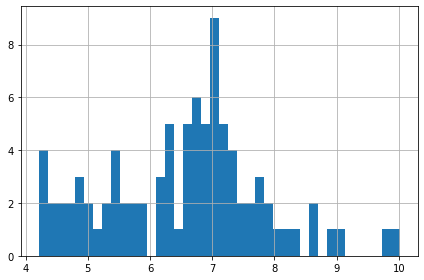

In [116]:
#Distribuição de dados pH med direta akso
import matplotlib.pyplot as plt
import pandas as pd 
df['pH_Medicao_Direta_Akso'].hist(bins=40)
plt.tight_layout()
plt.show()

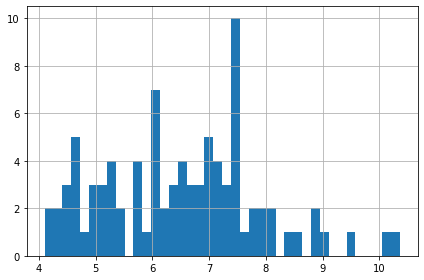

In [117]:
#Distribuição de dados pH aquoso
df['pH_Meio_Aquoso'].hist(bins=40)
plt.tight_layout()
plt.show()

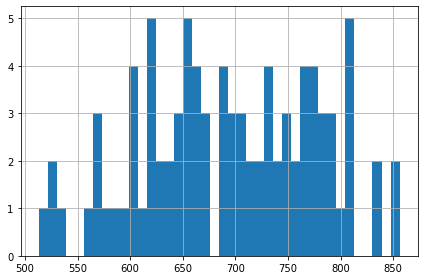

In [118]:
#Distribuição de dados esp32
df['ESP32_Média_Movel'].hist(bins=40)
plt.tight_layout()
plt.show()

In [119]:
# Verificar valores faltosos:
pd.options.mode.use_inf_as_na = True
df.isnull().sum()

pH_Meio_Aquoso            0
pH_Medicao_Direta_Akso    0
ESP32_Média_Movel         0
dtype: int64

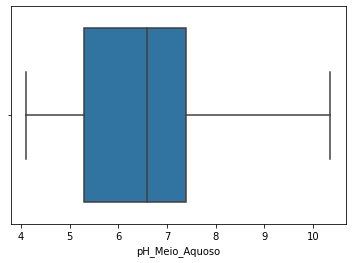

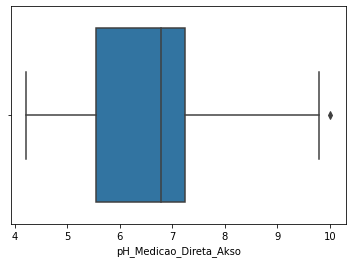

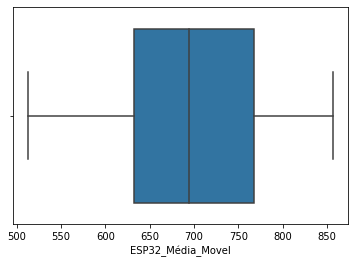

In [120]:
#Verificar Outliers
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns
for feature in ['pH_Meio_Aquoso', 'pH_Medicao_Direta_Akso', 'ESP32_Média_Movel']:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.boxplot(df[feature])

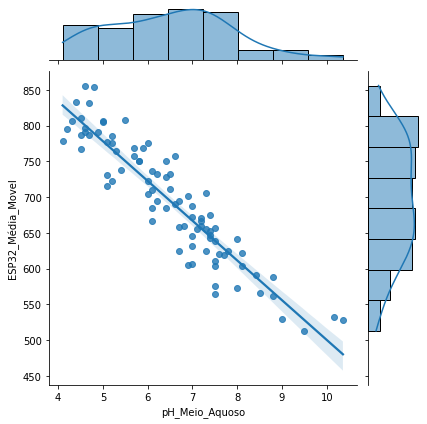

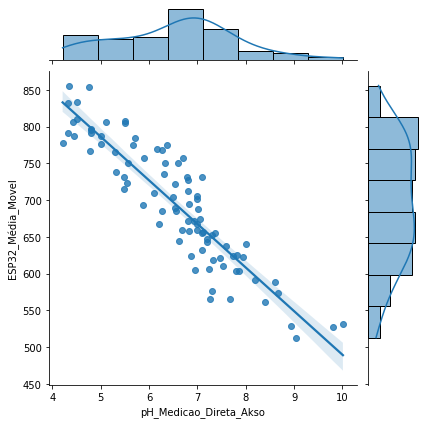

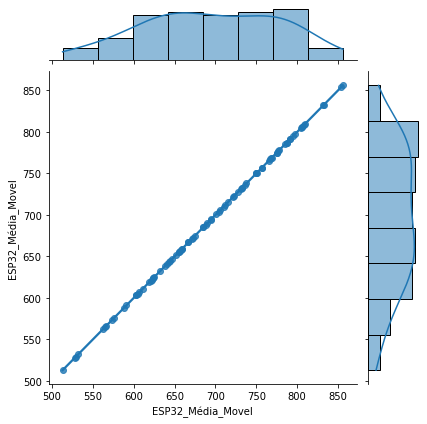

In [121]:
from seaborn import jointplot
for feature in ['pH_Meio_Aquoso', 'pH_Medicao_Direta_Akso', 'ESP32_Média_Movel']: 
  p = jointplot(feature, "ESP32_Média_Movel", data=df, kind="reg")

##Correlação de Pearson

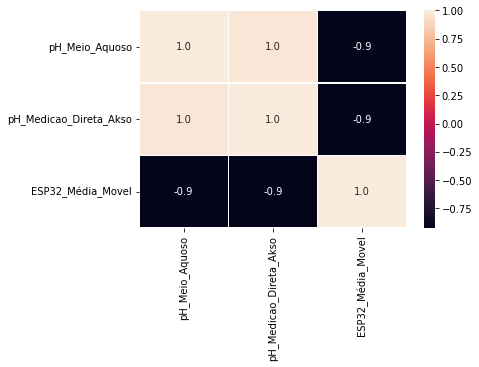

In [122]:
correlation = df.corr()
# plot da matriz de correlação
import seaborn as sn
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [123]:
print(correlation)

                        pH_Meio_Aquoso  pH_Medicao_Direta_Akso  \
pH_Meio_Aquoso                1.000000                0.972046   
pH_Medicao_Direta_Akso        0.972046                1.000000   
ESP32_Média_Movel            -0.923839               -0.909744   

                        ESP32_Média_Movel  
pH_Meio_Aquoso                  -0.923839  
pH_Medicao_Direta_Akso          -0.909744  
ESP32_Média_Movel                1.000000  


##Correlação de Spearman

In [124]:
def display_correlation(discorr):
    r = discorr.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(discorr.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

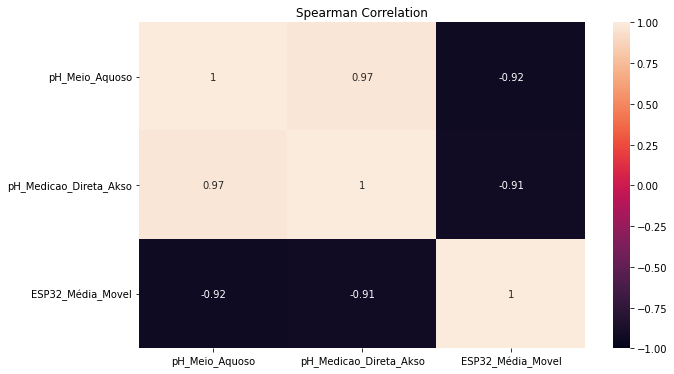

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt

r_simple=display_correlation(df)

In [126]:
my_r = df.corr(method="spearman")
print(my_r)

                        pH_Meio_Aquoso  pH_Medicao_Direta_Akso  \
pH_Meio_Aquoso                1.000000                0.972102   
pH_Medicao_Direta_Akso        0.972102                1.000000   
ESP32_Média_Movel            -0.931042               -0.919443   

                        ESP32_Média_Movel  
pH_Meio_Aquoso                  -0.931042  
pH_Medicao_Direta_Akso          -0.919443  
ESP32_Média_Movel                1.000000  


##Normalidade

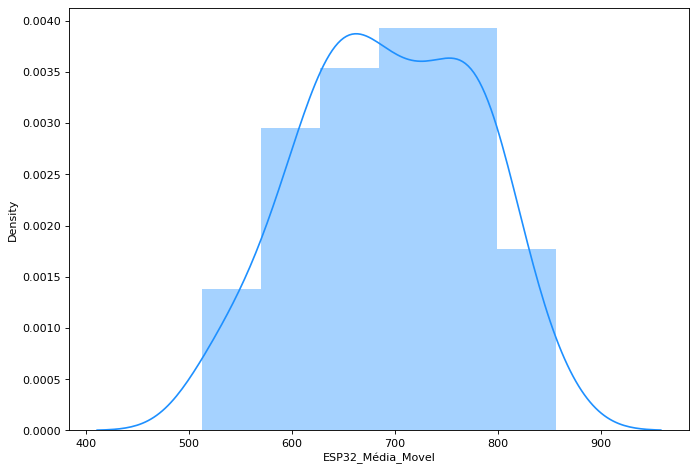

In [127]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df['ESP32_Média_Movel'], color="dodgerblue", label="Compact",)

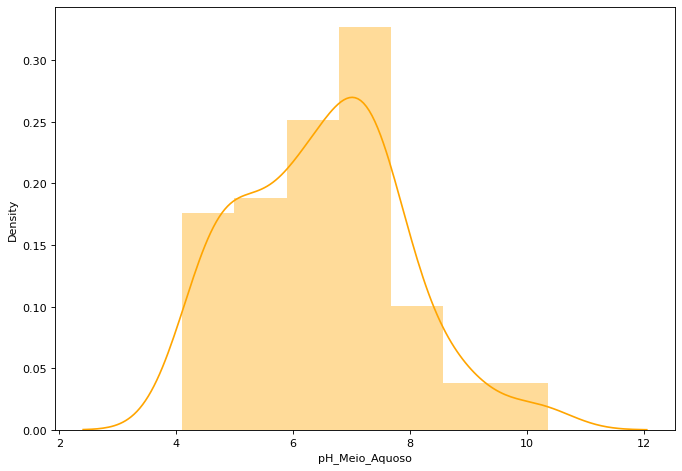

In [128]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df['pH_Meio_Aquoso'], color="orange", label="Compact",)

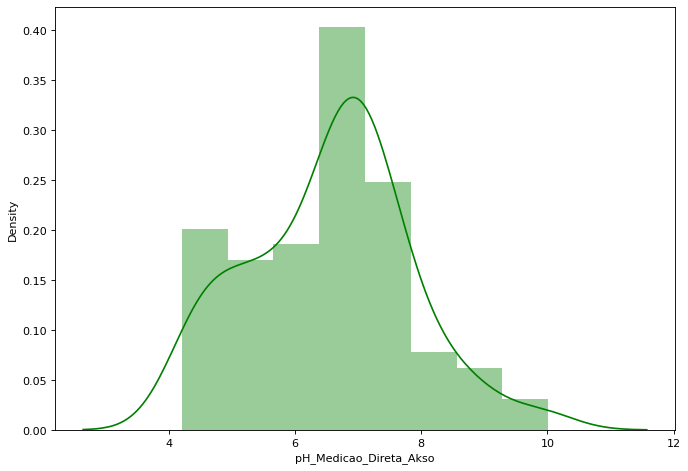

In [129]:

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df['pH_Medicao_Direta_Akso'], color="green", label="Compact",)

In [130]:
# Teste de normalidade valores da ESP-32
from scipy import stats
plt.show()
alpha = 0.05
k2, p = stats.normaltest(df['ESP32_Média_Movel'])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
    print("A Hipótese Nula pode ser rejeitada: Não segue distribuição normal")
else:
    print("A hipótese nula não pode ser rejeitada: Segue distribuição normal")

A hipótese nula não pode ser rejeitada: Segue distribuição normal


In [131]:
# teste de normalidade pH aquoso
plt.show()
alpha = 0.05
k2, p = stats.normaltest(df['pH_Meio_Aquoso'])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
    print("A Hipótese Nula pode ser rejeitada: Não segue distribuição normal")
else:
    print("A hipótese nula não pode ser rejeitada: Segue distribuição normal")


A hipótese nula não pode ser rejeitada: Segue distribuição normal


In [132]:
# teste de normalidade pH aquoso
plt.show()
alpha = 0.05
k2, p = stats.normaltest(df['pH_Medicao_Direta_Akso'])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
    print("A Hipótese Nula pode ser rejeitada: Não segue distribuição normal")
else:
    print("A hipótese nula não pode ser rejeitada: Segue distribuição normal")


A hipótese nula não pode ser rejeitada: Segue distribuição normal


##remover outleirs

In [133]:
for x in ['pH_Meio_Aquoso']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [134]:
df.isnull().sum()

pH_Meio_Aquoso            0
pH_Medicao_Direta_Akso    0
ESP32_Média_Movel         0
dtype: int64

In [135]:
#descarte de outleires
df = df.dropna(axis = 0)

In [136]:
df.isnull().sum()

pH_Meio_Aquoso            0
pH_Medicao_Direta_Akso    0
ESP32_Média_Movel         0
dtype: int64

In [137]:
for x in ['ESP32_Média_Movel']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [138]:
df.isnull().sum()

pH_Meio_Aquoso            0
pH_Medicao_Direta_Akso    0
ESP32_Média_Movel         0
dtype: int64

In [139]:
#descarte de outleires
df = df.dropna(axis = 0)

In [140]:
df.isnull().sum()

pH_Meio_Aquoso            0
pH_Medicao_Direta_Akso    0
ESP32_Média_Movel         0
dtype: int64

In [141]:
# Verifique a distribuição de destino 
a= df [ 'pH_Medicao_Direta_Akso' ] .value_counts ( normalize = True )
a

6.80    0.033708
4.80    0.033708
7.00    0.033708
4.32    0.022472
6.27    0.022472
          ...   
9.03    0.011236
4.35    0.011236
7.74    0.011236
7.47    0.011236
5.70    0.011236
Name: pH_Medicao_Direta_Akso, Length: 74, dtype: float64

In [142]:
# Verifique a distribuição de destino 
b=df [ 'pH_Meio_Aquoso' ] .value_counts ( normalize = True )
b

7.50     0.067416
7.00     0.056180
6.10     0.044944
7.40     0.044944
4.50     0.033708
6.40     0.033708
6.70     0.033708
4.60     0.033708
5.10     0.033708
6.00     0.033708
7.30     0.033708
7.20     0.033708
5.20     0.033708
6.20     0.022472
8.00     0.022472
8.80     0.022472
5.00     0.022472
6.60     0.022472
6.50     0.022472
8.10     0.022472
5.70     0.022472
5.80     0.022472
6.90     0.022472
4.70     0.022472
4.10     0.011236
10.36    0.011236
4.90     0.011236
7.70     0.011236
4.30     0.011236
5.30     0.011236
8.50     0.011236
4.20     0.011236
4.80     0.011236
7.10     0.011236
10.16    0.011236
7.60     0.011236
9.50     0.011236
9.00     0.011236
8.41     0.011236
5.50     0.011236
4.40     0.011236
6.80     0.011236
5.40     0.011236
5.90     0.011236
7.80     0.011236
Name: pH_Meio_Aquoso, dtype: float64

In [143]:
# Verifique a distribuição de destino 
c= df [ 'ESP32_Média_Movel' ] .value_counts ( normalize = True )
c

775.0    0.022472
655.0    0.022472
750.0    0.022472
757.0    0.022472
685.0    0.022472
           ...   
591.0    0.011236
529.0    0.011236
576.0    0.011236
695.0    0.011236
672.0    0.011236
Name: ESP32_Média_Movel, Length: 76, dtype: float64

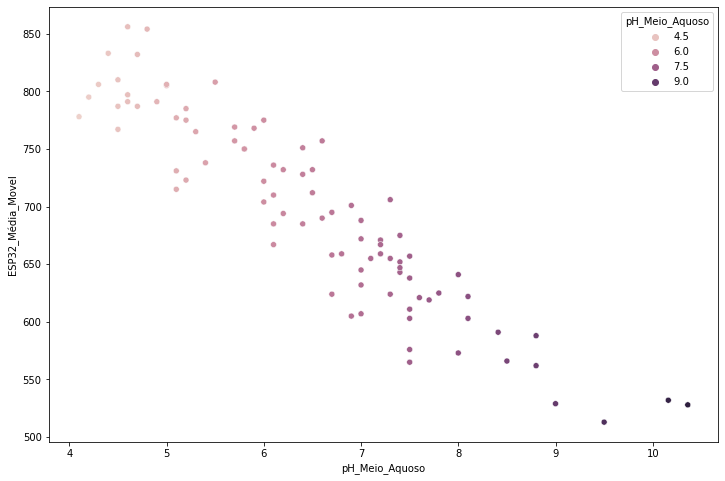

In [144]:
# Visualize os dados 
plt.figure ( figsize= ( 12, 8 ))
sns.scatterplot ( x = 'pH_Meio_Aquoso', y = 'ESP32_Média_Movel', hue = 'pH_Meio_Aquoso', data = df )

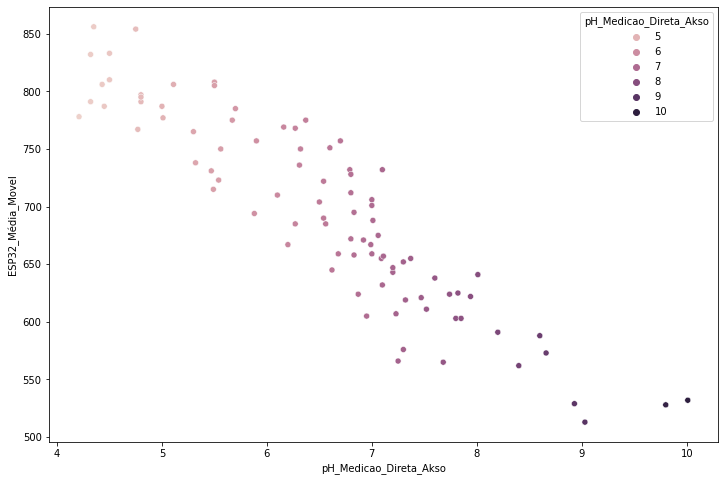

In [145]:
plt.figure ( figsize= ( 12, 8 ))
sns.scatterplot ( x = 'pH_Medicao_Direta_Akso', y = 'ESP32_Média_Movel', hue = 'pH_Medicao_Direta_Akso', data = df )

##Analise da Normalidade
Teste de Normalidade dos Dados

Aplicou-se o teste Shapiro-Wilk:

Ho= distribuição normal: p-value> 0.05.

Ha = distribuição não normal : p-value <= 0,05

In [146]:
import scipy.stats as stats
import pylab
def teste_shapiro(data):
  shapiro_stat, shapiro_p_valor=stats.shapiro(data)
  print('O valor da estatistica de Shapiro-Wilk =%.3f, O valor de p de Shapiro-Wilk=%.3f' % (shapiro_stat, shapiro_p_valor))
  alpha = 0.05
  return shapiro_p_valor > alpha

for columns in list(df.keys()):
   print(f'\n** {columns} **')
   nenhum_rejeita = True
   for feature in ['pH_Meio_Aquoso', 'pH_Medicao_Direta_Akso', 'ESP32_Média_Movel']:
    print(f'- Métrica: {feature}')
    if teste_shapiro(df[feature]):
      print(f'Segue uma distribuição Normal(não rejeita H0)')
      nenhum_rejeita = False
    if nenhum_rejeita: print('Não segue uma distribuição Normal (rejeita H0)')


** pH_Meio_Aquoso **
- Métrica: pH_Meio_Aquoso
O valor da estatistica de Shapiro-Wilk =0.972, O valor de p de Shapiro-Wilk=0.053
Segue uma distribuição Normal(não rejeita H0)
- Métrica: pH_Medicao_Direta_Akso
O valor da estatistica de Shapiro-Wilk =0.973, O valor de p de Shapiro-Wilk=0.058
Segue uma distribuição Normal(não rejeita H0)
- Métrica: ESP32_Média_Movel
O valor da estatistica de Shapiro-Wilk =0.979, O valor de p de Shapiro-Wilk=0.170
Segue uma distribuição Normal(não rejeita H0)

** pH_Medicao_Direta_Akso **
- Métrica: pH_Meio_Aquoso
O valor da estatistica de Shapiro-Wilk =0.972, O valor de p de Shapiro-Wilk=0.053
Segue uma distribuição Normal(não rejeita H0)
- Métrica: pH_Medicao_Direta_Akso
O valor da estatistica de Shapiro-Wilk =0.973, O valor de p de Shapiro-Wilk=0.058
Segue uma distribuição Normal(não rejeita H0)
- Métrica: ESP32_Média_Movel
O valor da estatistica de Shapiro-Wilk =0.979, O valor de p de Shapiro-Wilk=0.170
Segue uma distribuição Normal(não rejeita H0)

*

In [147]:
valoresphmedidos =df[['pH_Meio_Aquoso', 'pH_Medicao_Direta_Akso', 'ESP32_Média_Movel']]
valoresphmedidos

,pH_Meio_Aquoso,pH_Medicao_Direta_Akso,ESP32_Média_Movel
0,7.0,7.23,607.0
1,6.7,6.83,695.0
2,7.2,6.92,671.0
3,7.2,6.99,667.0
4,7.4,7.30,652.0
...,...,...,...
84,7.5,7.85,603.0
85,7.5,7.11,657.0
86,6.1,6.56,685.0
87,5.2,5.70,785.0


In [148]:
#pH medição meio aquoso
stats.shapiro(valoresphmedidos.pH_Meio_Aquoso) 

ShapiroResult(statistic=0.9722622036933899, pvalue=0.05337866023182869)

p > 0.05 então segue distribuição normal

In [149]:
#pH medição direta no solo(akso)
stats.shapiro(valoresphmedidos.pH_Medicao_Direta_Akso)

ShapiroResult(statistic=0.9727921485900879, pvalue=0.05815822631120682)

p > 0.05 então segue distribuição normal

In [150]:
# Valores analogicos ESP32_Média_Movel
stats.shapiro(valoresphmedidos.ESP32_Média_Movel)

ShapiroResult(statistic=0.9794191718101501, pvalue=0.16975319385528564)

- Variável Correspondente: pH_Meio_Aquoso


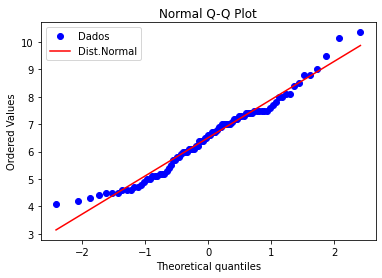

- Variável Correspondente: pH_Medicao_Direta_Akso


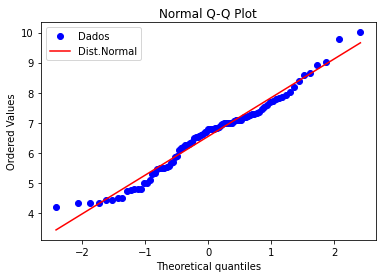

- Variável Correspondente: ESP32_Média_Movel


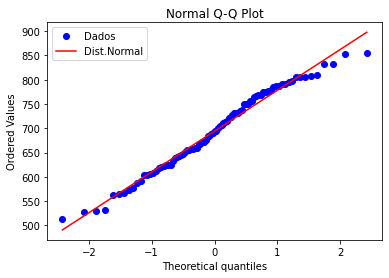

In [151]:
for feature in ['pH_Meio_Aquoso', 'pH_Medicao_Direta_Akso', 'ESP32_Média_Movel']:
    stats.probplot(df[feature], dist="norm", plot=pylab)
    print(f'- Variável Correspondente: {feature}')
    pylab.title("Normal Q-Q Plot")
    pylab.legend(['Dados','Dist.Normal'],loc='upper left')
    pylab.show()

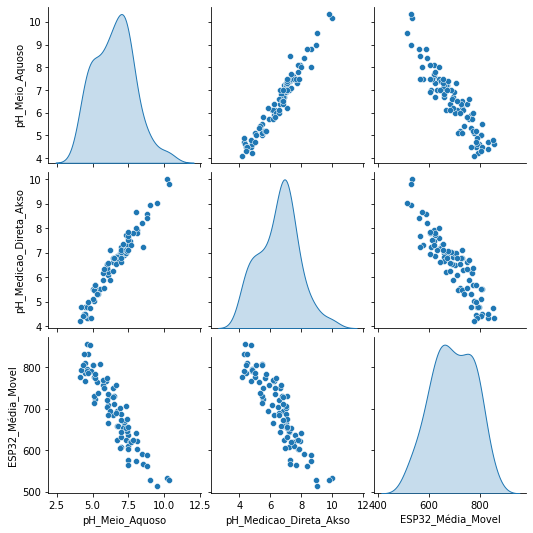

In [152]:
#Visualização de dados
sns.pairplot(data=df, diag_kind='kde')

#Regressão Linear

In [153]:
import pandas as pd #para ler e manipular nossos dados
from sklearn.linear_model import LinearRegression  #modelo de regressão linear simples
from sklearn.model_selection import train_test_split #ferramenta para separar nossos dados

In [154]:
df1= df[['ESP32_Média_Movel', 'pH_Meio_Aquoso']]
df1

,ESP32_Média_Movel,pH_Meio_Aquoso
0,607.0,7.0
1,695.0,6.7
2,671.0,7.2
3,667.0,7.2
4,652.0,7.4
...,...,...
84,603.0,7.5
85,657.0,7.5
86,685.0,6.1
87,785.0,5.2


In [155]:
#Regressão Linear 
import statsmodels.api as sm
from statsmodels.formula.api import ols
regressao1 = ols('pH_Meio_Aquoso~ESP32_Média_Movel', data=df).fit() #relação da variável de entrada e verificar sua influência sobre a variável de destino. 
anova_table = sm.stats.anova_lm(regressao1, typ=2)#aplicou anova no modelo
print(anova_table)

                       sum_sq    df          F        PR(>F)
ESP32_Média_Movel  144.148824   1.0  506.77179  4.798868e-38
Residual            24.746736  87.0        NaN           NaN


In [156]:
print(f"Overall model F({regressao1.df_model: .0f},{regressao1.df_resid: .0f}) = {regressao1.fvalue: .3f}, p = {regressao1.f_pvalue: .4f}")
print(regressao1.summary())

Overall model F( 1, 87) =  506.772, p =  0.0000
                            OLS Regression Results                            
Dep. Variable:         pH_Meio_Aquoso   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     506.8
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           4.80e-38
Time:                        02:39:41   Log-Likelihood:                -69.328
No. Observations:                  89   AIC:                             142.7
Df Residuals:                      87   BIC:                             147.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [157]:
import pandas as pd #para ler e manipular nossos dados
from sklearn.linear_model import LinearRegression  #modelo de regressão linear simples
from sklearn.model_selection import train_test_split #ferramenta para separar nossos dados

In [158]:
df1= df[['ESP32_Média_Movel', 'pH_Meio_Aquoso']]
df1

,ESP32_Média_Movel,pH_Meio_Aquoso
0,607.0,7.0
1,695.0,6.7
2,671.0,7.2
3,667.0,7.2
4,652.0,7.4
...,...,...
84,603.0,7.5
85,657.0,7.5
86,685.0,6.1
87,785.0,5.2


In [159]:
x= df1.iloc[ : , 0:1].values
y= df1.iloc[ : , 1].values

In [160]:
#separando em base de treino e teste com 30% dos dados reservados para avaliar 
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)

In [161]:
#definindo o algoritmo utilizado
LinearRegressionModel = LinearRegression()

In [162]:
#treinando o algoritmo com a base de treino
LinearRegressionModel.fit(X_train,y_train)

LinearRegression()

In [163]:
#criando a predição que será usada na avalização
y_pred = LinearRegressionModel.predict(X_test)

In [164]:
#R²
from sklearn.metrics import r2_score 
# em metrics, temos quase todas as metricas geralmete utilizadas

R2 = r2_score(y_test,y_pred)
print(R2)

0.8960175361285524


In [165]:
#Erro médio Quadrático(MSE)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.2629951292016087

In [166]:
#Erro Absoluto Médio(MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.42169774662895837

In [167]:
# MAPE(exprime uma porcentagem, obtida através da divisão da diferença entre predito (ŷ) e real pelo valor real (y))
#significa que, em média, nosso modelo faz previsões que erram por x% do valor real.

MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Valor do MAPE dado em percentual: {MAPE}")

Valor do MAPE dado em percentual: 6.704352860510989


In [168]:
# MAPE Erro Percentual Medio Absoluto
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.06704352860510988

In [169]:
#Erro máximo
from sklearn.metrics import max_error
max_error(y_test, y_pred)

1.4132513432856513

**Validação cruzada Kfold**

In [170]:
df1= df[['ESP32_Média_Movel', 'pH_Meio_Aquoso']]
df1

,ESP32_Média_Movel,pH_Meio_Aquoso
0,607.0,7.0
1,695.0,6.7
2,671.0,7.2
3,667.0,7.2
4,652.0,7.4
...,...,...
84,603.0,7.5
85,657.0,7.5
86,685.0,6.1
87,785.0,5.2


In [171]:
y = df1['pH_Meio_Aquoso']
x = df1.drop('pH_Meio_Aquoso', axis =1)

In [172]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [173]:
modelo = LinearRegression()
kfold = KFold(n_splits=5)
Resultado = cross_val_score(modelo,x,y, cv=kfold)

In [174]:
print(Resultado)

[0.38583206 0.6994635  0.8897397  0.88396705 0.81721311]


In [175]:
print(Resultado.mean())

0.7352430867184394


In [176]:
modelo.fit(x,y)

LinearRegression()

In [177]:
modelo.intercept_

17.16798413713084

In [178]:
modelo.coef_

array([-0.01535258])

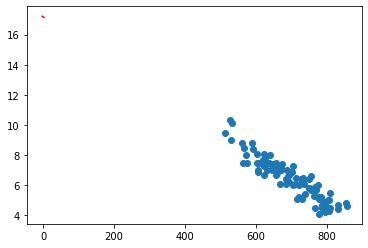

In [179]:
plt.scatter(x,y)
xreg = np.arange(-3,3,1)
plt.plot(xreg,-0.0153*xreg +17.167, color = 'red')
plt.show()

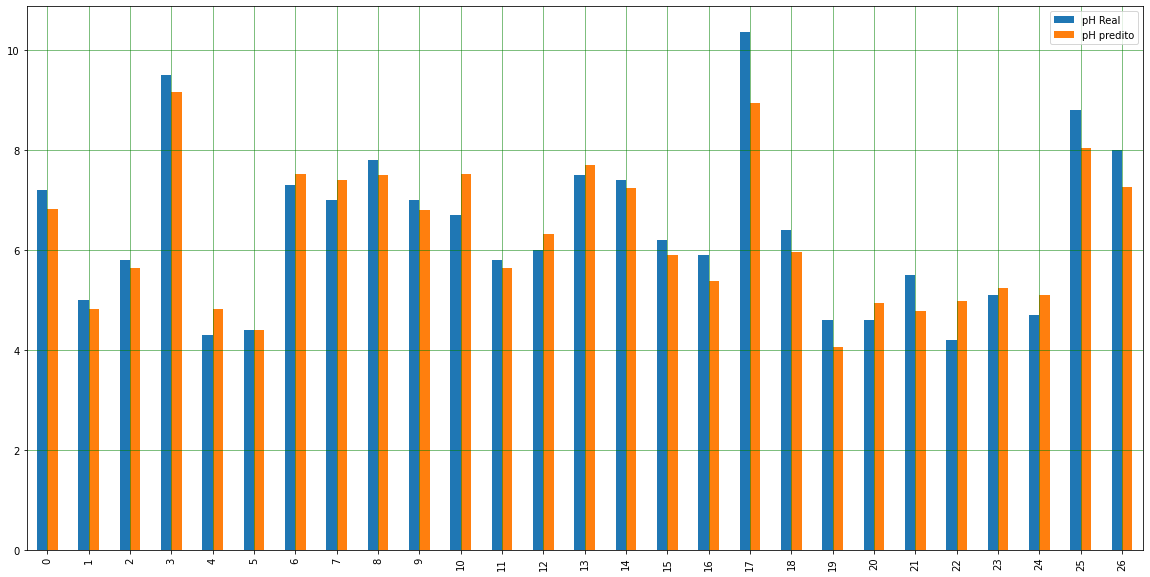

In [180]:
df1 = pd.DataFrame({'pH Real': y_test.flatten(), 'pH predito': y_pred.flatten()})
df1.plot(kind='bar',figsize=(20,10)) 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

###**Validação do Modelo de Regressão Linear**

**Analise dos Residuos**

In [181]:
# listagem de residuos(distancia que o ponto está da reta)
residuos = regressao1.resid
residuos

0    -0.848968
1     0.202059
2     0.333597
3     0.272187
4     0.241898
        ...   
84   -0.410378
85    0.418661
86   -0.551467
87    0.083791
88    0.148950
Length: 89, dtype: float64

**Teste de normalidade dos resíduos**

H0 = distribuição normal: p>0.05

Ha = distribuição não normal: p<=0.05

In [182]:
estatistica, p= stats.shapiro(residuos)
print('Estatística de Teste: {}' .format(estatistica))
print('p-valor: {}'.format(p))

Estatística de Teste: 0.983237087726593
p-valor: 0.30753031373023987


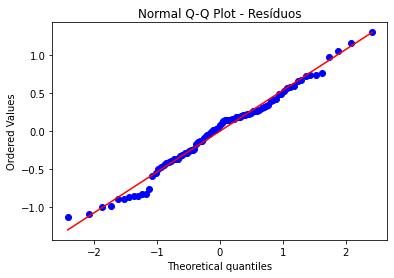

In [183]:
#Q-Q plot
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q-Q Plot - Resíduos')
plt.show()

**Analise de Homocedasticidade dos resíduos**

Saber se os resíduos são homogeneos

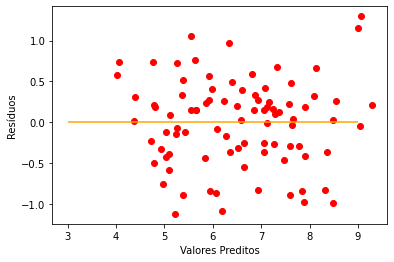

In [184]:
plt.scatter(y=residuos ,x=regressao1.predict(), color='red')
plt.hlines(y=0, xmin=3, xmax=9, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan(Homocedastiscidade ou Heterocedastiscidade)

Ho = Existe Homocedastiscidade: p> 0.05 Ha = Não existe Homocedastiscidade: p<= 0.05

In [185]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [186]:
estatistica, p, f, fp=sms.het_breuschpagan(regressao1.resid, regressao1.model.exog)
print('Estatistica do teste: {}' .format(estatistica))
print('p-valor: {}' .format(p))
print('f-valor: {}' .format(f))
print('f_p-valor: {}' .format(fp))

Estatistica do teste: 1.0504036053041819
p-valor: 0.30541415125604066
f-valor: 1.0390623426098538
f_p-valor: 0.3108659250976999


p-valor = 0.30. então p>0.05. significa que tem Homocedastiscidade.

**Outleires nos resíduos**

(Entre -3 e 3)

In [187]:
outliers= regressao1.outlier_test()

In [188]:
outliers.max()

student_resid    2.586456
unadj_p          0.982015
bonf(p)          1.000000
dtype: float64

In [189]:
outliers.min()

student_resid   -2.176515
unadj_p          0.011379
bonf(p)          1.000000
dtype: float64

Portanto o modelo passou no teste de Normalidade, Homocedasticidade e Outleires de Resíduos, portanto o modelo é aprovado.

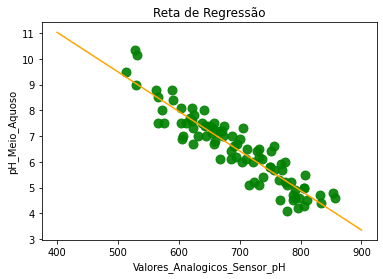

In [190]:
#Simulação de regressão
plt.scatter(y= df.pH_Meio_Aquoso, x=df.ESP32_Média_Movel ,color='green', s=80, alpha=0.9)
X_plot = np.linspace(400, 900)
plt.plot(X_plot, X_plot*regressao1.params[1] + regressao1.params[0], color='orange')
plt.title('Reta de Regressão')
plt.ylabel('pH_Meio_Aquoso')
plt.xlabel('Valores_Analogicos_Sensor_pH')
plt.show()

**Teste de Autocorrelação**


Teste de Durbin-Watson: Isso é feito comparando os termos de erro sucessivos para verificar se eles estão correlacionados direta/inversamente entre si. Valores entre 1,5 e 2,5 nos diriam que a autocorrelação não é um problema nesse modelo preditivo.

In [191]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(regressao1.resid)

1.9435148712293953

### Comparando Modelos

In [192]:
df1= df[['ESP32_Média_Movel', 'pH_Meio_Aquoso']]
df1

,ESP32_Média_Movel,pH_Meio_Aquoso
0,607.0,7.0
1,695.0,6.7
2,671.0,7.2
3,667.0,7.2
4,652.0,7.4
...,...,...
84,603.0,7.5
85,657.0,7.5
86,685.0,6.1
87,785.0,5.2


In [193]:
y = df1['pH_Meio_Aquoso']
x = df1.drop('pH_Meio_Aquoso', axis =1)

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
def modelregressionfold(a,b):
  kfold = KFold(n_splits=10)
  x = a
  y = b
  reg = LinearRegression()
  ridge = Ridge()
  lasso = Lasso()
  elastic = ElasticNet()
  res_reg = cross_val_score(reg,x,y, cv=kfold)
  res_ridge = cross_val_score(ridge,x,y, cv=kfold)
  res_lasso = cross_val_score(lasso,x,y, cv=kfold)
  res_elastic = cross_val_score(elastic,x,y, cv=kfold)
  dic_regmodels = {'Linear': res_reg.mean(),'Ridge': res_ridge.mean(),'Lasso': res_lasso.mean(), 'Elastic': res_elastic.mean()}
  #melhor_modelo = max(dic_regmodels)
  print('Regressão Linear: ', res_reg.mean(),'Regressão Ridge: ', res_ridge.mean(),'Regressão Lasso: ', res_lasso.mean(), 'Regressão Elastic: ', res_elastic.mean())
  #print('O melhor modelo foi: ', melhor_modelo, 'Com o valor',[melhor_modelo])




In [195]:
modelregressionfold(x,y)

Regressão Linear:  0.7050225795520031 Regressão Ridge:  0.7050230984961949 Regressão Lasso:  0.7075071722438165 Regressão Elastic:  0.7063141649871942


# Otimização

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [197]:
#Definindo Valores que serão testados
valores = {'alpha':[0.1,0.5,1,2,5,10,25,50,100,200,300,500,700,1000], 'l1_ratio':[0.01,0.01, 0.02,0.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.8,1]}

In [198]:
modelo.fit(x,y)

LinearRegression()

In [199]:
modelo = ElasticNet()
procura = GridSearchCV(estimator= modelo, param_grid=valores, cv =5)
procura.fit(x,y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10, 25, 50, 100, 200, 300,
                                   500, 700, 1000],
                         'l1_ratio': [0.01, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3,
                                      0.4, 0.5, 0.8, 1]})

In [200]:
print('Melhor Score: ', procura.best_score_)
print('Melhor Alpha: ', procura.best_estimator_ )
print('Melhor l1 ratio:', procura.best_estimator_.l1_ratio)

Melhor Score:  0.7416257647305572
Melhor Alpha:  ElasticNet(alpha=300, l1_ratio=0.01)
Melhor l1 ratio: 0.01


In [201]:
# define model
model = ElasticNet(alpha=300, l1_ratio=0.01)

In [202]:
model.fit(x,y)

ElasticNet(alpha=300, l1_ratio=0.01)

In [203]:
print(model.coef_)

[-0.01429802]


In [204]:
print(model.intercept_)

16.435847960409095
